In [82]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt
import mlrose
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve

import os
import time

In [83]:
## Move to correct folder for server.  Can remove before sending
os.chdir('/home/poblivsig/Dropbox/Random-Optimization')
print(os.getcwd())

## Open the pre-processed csv
df = pd.read_csv('data/phishing.csv')

## Get info about wine
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)


/home/poblivsig/Dropbox/Random-Optimization
Shape

(11055, 32)
Columns

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')
dtypes

id                             int64
having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_Sta

In [84]:
## Split up the data

y = df['Result']
X = df.drop('Result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    # stratify=y,
                                                    random_state=15)
print(df.shape)

(11055, 32)


In [85]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
## Tuning
ACTIVATION_TYPE = 'sigmoid'
HIDDEN_NODES = [25]
MAX_ITERS = 1000
LEARNING_RATE = 0.001
ALPHA = 1e-06
RANDOM_SEED = 42

## Lists for graphs
curve_list = []
accuracy_training = []
accuracy_testing = []

precision_training = []
precision_testing = []

f1_training = []
f1_testing = []

recall_training = []
recall_testing = []

In [119]:
algorithms = [ 'random_hill_climb',
               'simulated_annealing',
               'genetic_alg',
               'gradient_descent']

# Main loop - Run through all of the algorithms and compare
for algorithm in algorithms:
    problem = mlrose.NeuralNetwork( activation=ACTIVATION_TYPE,
                                    algorithm=algorithm,
                                    # alpha=ALPHA,
                                    clip_max=1,
                                    curve=True,
                                    early_stopping=True,
                                    hidden_nodes=HIDDEN_NODES,
                                    learning_rate=LEARNING_RATE,
                                    max_iters=MAX_ITERS,
                                    random_state= RANDOM_SEED)
    print(f'Running {algorithm}')

    start_time = time.time()
    ## Fit the neural network and grab the relevant data for charts.
    problem.fit(X_train, y_train)
    print(f'{algorithm} time = {time.time() - start_time}')

    curve = problem.fitness_curve

    y_train_pred = problem.predict(X_train)
    y_test_pred = problem.predict(X_test)

    if algorithm == 'gradient_descent':
        curve = -curve

    curve_list.append(curve)

    ## Add accuracy curves
    accuracy_training.append(accuracy_score(y_train, y_train_pred))
    accuracy_testing.append(accuracy_score(y_test, y_test_pred))

    ## Add precision scores
    precision_training.append(precision_score(y_train,
                                              y_train_pred,
                                              average='micro'))
    precision_testing.append(precision_score(y_test,
                                             y_test_pred,
                                             average='micro'))
    ## Add f1 scores
    f1_training.append(f1_score(y_train,
                                y_train_pred,
                                average='micro'))
    f1_testing.append(f1_score(y_test,
                               y_test_pred,
                               average='micro'))

    ## Add Recall scores
    recall_training.append(recall_score(y_train,
                           y_train_pred,
                           average='micro'))
    recall_testing.append(recall_score(y_test,
                          y_test_pred,
                          average='micro'))

Running random_hill_climb
random_hill_climb time = 5.447072982788086
Running simulated_annealing
simulated_annealing time = 22.537556886672974
Running genetic_alg
genetic_alg time = 34.5397675037384
Running gradient_descent
gradient_descent time = 0.649970531463623


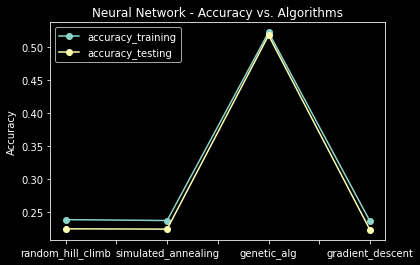

                     accuracy_training  accuracy_testing
random_hill_climb             0.238241          0.224333
simulated_annealing           0.236884          0.223881
genetic_alg                   0.521936          0.517413
gradient_descent              0.235753          0.222524


In [117]:
## Accuracy graph
accuracy_df = pd.DataFrame(data={'accuracy_training': accuracy_training,
                                 'accuracy_testing': accuracy_testing},
                           index=algorithms,)
accuracy_df.plot(style="o-")

## Plot the graph
plt.title("Neural Network - Accuracy vs. Algorithms")
plt.ylabel("Accuracy")
plt.style.use('dark_background')
plt.savefig("data/nn_accuracy_sigm_25_001.png")
plt.show()

print(accuracy_df)

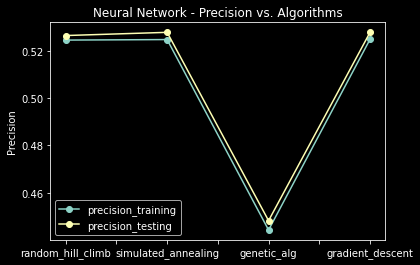

                     precision_training  precision_testing
random_hill_climb              0.524536           0.526459
simulated_annealing            0.524763           0.527815
genetic_alg                    0.444256           0.448213
gradient_descent               0.524876           0.527815


In [90]:
## Precision graph
precision_df = pd.DataFrame(data={'precision_training': precision_training,
                                  'precision_testing': precision_testing},
                            index=algorithms,)
precision_df.plot(style="o-")

## Plot the graph
plt.title("Neural Network - Precision vs. Algorithms")
plt.ylabel("Precision")
plt.style.use('dark_background')
plt.savefig("data/nn_precision_relu_25_001.png")
plt.show()

print(precision_df)

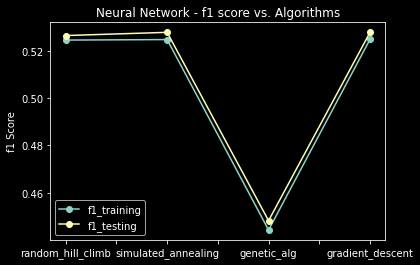

                     f1_training  f1_testing
random_hill_climb       0.524536    0.526459
simulated_annealing     0.524763    0.527815
genetic_alg             0.444256    0.448213
gradient_descent        0.524876    0.527815


In [91]:
## f1 score graph
f1_score_df = pd.DataFrame(data={'f1_training': f1_training,
                                 'f1_testing': f1_testing},
                           index=algorithms,)
f1_score_df.plot(style="o-")

## Plot the graph
plt.title("Neural Network - f1 score vs. Algorithms")
plt.ylabel("f1 Score")
plt.style.use('dark_background')
# plt.style.use('dark_background')
plt.savefig("data/nn_f1_score_relu_25_001.png")
plt.show()
plt.close()

print(f1_score_df)

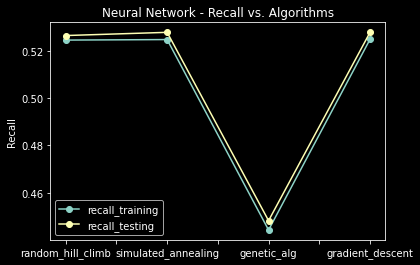

                     f1_training  f1_testing
random_hill_climb       0.524536    0.526459
simulated_annealing     0.524763    0.527815
genetic_alg             0.444256    0.448213
gradient_descent        0.524876    0.527815


In [92]:
## Recall graph
recall_df = pd.DataFrame(data={'recall_training': recall_training,
                               'recall_testing': recall_testing},
                         index=algorithms,)
recall_df.plot(style='o-')

## Plot the graph
plt.title('Neural Network - Recall vs. Algorithms')
plt.ylabel('Recall')
plt.style.use('dark_background')
# plt.style.use('dark_background')
plt.savefig("data/nn_recall_relu_25_001.png")
plt.show()

print(f1_score_df)

In [65]:
## Confusion Matrix
cm = plot_confusion_matrix(problem,
                           X_test,
                           y_test,
                           cmap=plt.cm.Blues,
                           normalize='true')
plt.title('Confusion Matrix for Phishing problem')
plt.show(cm)
plt.show()

AttributeError: 'NeuralNetwork' object has no attribute 'classes_'

In [ ]:
## Create barchart for accuracies
ind = len(algorithms)
width = 0.36

fig, ax = plt.subplots()
rectangles1 = ax.bar(ind,
                     accuracy_training,
                     width,
                     color='r')
rectangles2 = ax.bar(ind,
                     accuracy_testing,
                     width,
                     color='g')

ax.set_title('Neural Network Algorithm Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(algorithms)
ax.legend((rectangles1[0], rectangles2[0]),
          ('Training', 'Testing'))
plt.savefig('data/nn_accuracy_bar.png')
plt.show()
plt.close()